In [1]:
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyswmm_lite import Env
import pickle
from automate_objective import generate_targets, generate_weights
from utilities_baeopt import swmm_execute, uncontrolled_response
import matplotlib.pyplot as plt
from GPyOpt.methods import BayesianOptimization
import requests
np.random.seed(42)
NODES_LIS = {'93-49743' : 'OR39',
             '93-49868' : 'OR34',
             '93-49919' : 'OR44',
             '93-49921' : 'OR45',
             '93-50074' : 'OR38',
             '93-50076' : 'OR46',
             '93-50077' : 'OR48',
             '93-50081' : 'OR47',
             '93-50225' : 'OR36',
             '93-90357' : 'OR43',
             '93-90358' : 'OR35'}

# Test the response of the ensemble. 
uncontrolled_responses = {}
ensemble = np.linspace(1, 20, 20, dtype=int)
for i in ensemble:
    env = Env("./raindata/"+str(i)+"runfile.inp")
    uncontrolled_responses[str(i)] = uncontrolled_response(env, NODES_LIS, save=False, destiation = "./"+str(i)+".npy")

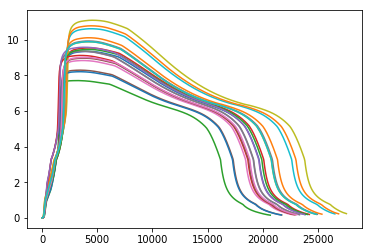

In [2]:
for i in uncontrolled_responses.keys():
    a = uncontrolled_responses[i]["outflows"]['93-50077']
    plt.plot(a)